### Spacy
#### spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

#### spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.


### Features

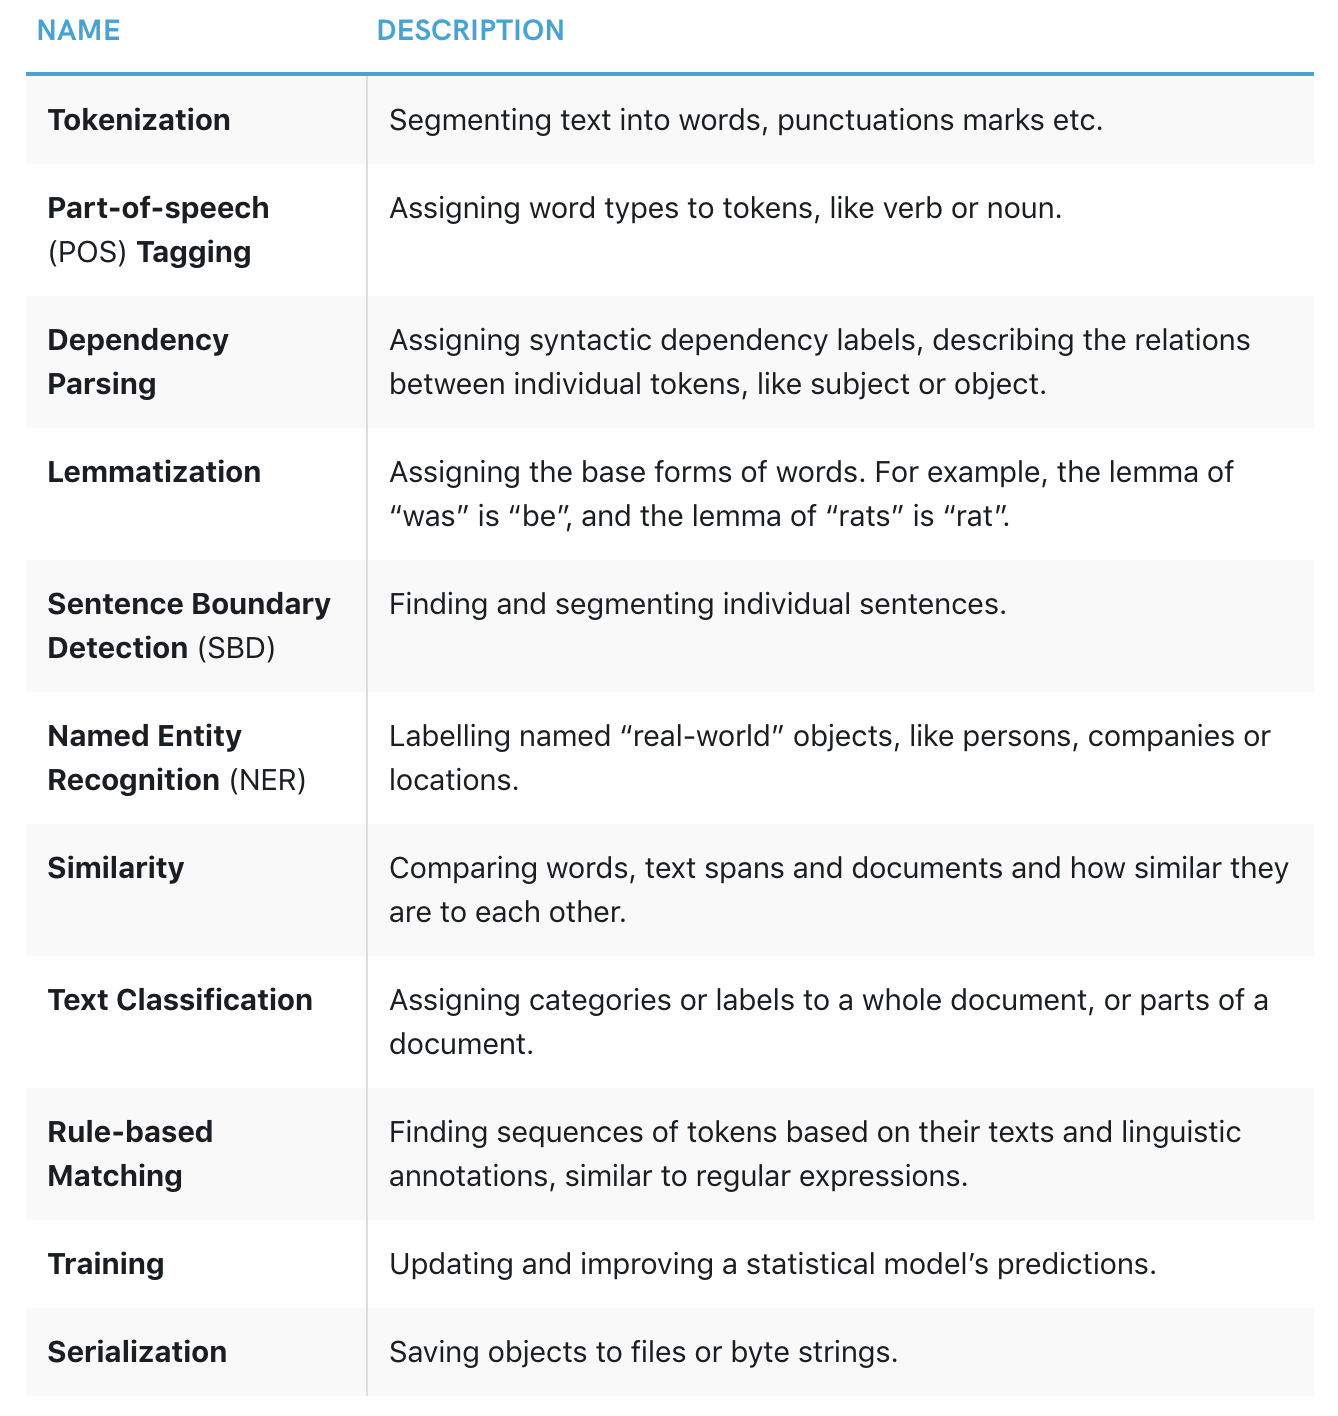

### Install the library

In [5]:
! pip install -U spacy

  Using cached https://files.pythonhosted.org/packages/5c/38/fc37ad63427e9781e4bf5f350f9a1b9e472b3e48bc856ada9ace7fcf1b7d/spacy-2.1.8-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
Requirement not upgraded as not directly required: numpy>=1.15.0 in /anaconda3/envs/keras-tf/lib/python3.6/site-packages (from spacy) (1.16.3)
Requirement not upgraded as not directly required: blis<0.3.0,>=0.2.2 in /anaconda3/envs/keras-tf/lib/python3.6/site-packages (from spacy) (0.2.4)
Requirement not upgraded as not directly required: plac<1.0.0,>=0.9.6 in /anaconda3/envs/keras-tf/lib/python3.6/site-packages (from spacy) (0.9.6)
Requirement not upgraded as not directly required: requests<3.0.0,>=2.13.0 in /anaconda3/envs/keras-tf/lib/python3.6/site-packages (from spacy) (2.18.4)
Requirement not upgraded as not directly required: wasabi<1.1.0,>=0.2.0 in /anaconda3/envs/keras-tf/lib/python3.6/site-packages (from spacy) (0.2.1)
  Using cached htt

### Once you download and install spaCy, the next step is to download the language model. We will be using the English language model.

In [6]:
! python -m spacy download en

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
⚠ Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


In [7]:
import spacy

In [8]:
sp = spacy.load('en_core_web_sm')

In [9]:
sentence = sp(u'Manchester United is looking to sign a forward for $90 million')

In [10]:
for word in sentence:
    print(word.text)

Manchester
United
is
looking
to
sign
a
forward
for
$
90
million


In [11]:
for word in sentence:
    print(word.text,  word.pos_)

Manchester PROPN
United PROPN
is VERB
looking VERB
to PART
sign VERB
a DET
forward NOUN
for ADP
$ SYM
90 NUM
million NUM


In [12]:
sentence2 = sp(u"Manchester United isn't looking to sign any forward.")

In [13]:
for word in sentence2:
    print(word.text,  word.pos_, word.dep_)

Manchester PROPN compound
United PROPN nsubj
is VERB aux
n't ADV neg
looking VERB ROOT
to PART aux
sign VERB xcomp
any DET det
forward ADV advmod
. PUNCT punct


In [14]:
document = sp(u'Hello from Stackabuse. The site with the best Python Tutorials. What are you looking for?')

In [15]:
for sentence in document.sents:
    print(sentence)

Hello from Stackabuse.
The site with the best Python Tutorials.
What are you looking for?


In [17]:
document[4]

The

In [16]:
document[4].is_sent_start

True

### Tokenization
#### Tokenization is the process of breaking a document down into words, punctuation marks, numeric digits, etc.

In [18]:
sentence3 = sp(u'"They\'re leaving U.K. for U.S.A."')
print(sentence3)

"They're leaving U.K. for U.S.A."


In [19]:
for word in sentence3:
    print(word.text)

"
They
're
leaving
U.K.
for
U.S.A.
"


In [20]:
sentence4 = sp(u"Hello, I am non-vegetarian, email me the menu at abc-xyz@gmai.com")
print(sentence4)

Hello, I am non-vegetarian, email me the menu at abc-xyz@gmai.com


In [21]:
for word in sentence4:
    print(word.text)

Hello
,
I
am
non
-
vegetarian
,
email
me
the
menu
at
abc-xyz@gmai.com


In [22]:
len(sentence4)

14

### Detecting Entities
#### In addition to tokenizing the documents to words, you can also find if the word is an entity such as a company, place, building, currency, institution, etc.

In [23]:
sentence5 = sp(u'Manchester United is looking to sign Harry Kane for $90 million')

In [26]:
for word in sentence5:
    print(word.text)

Manchester
United
is
looking
to
sign
Harry
Kane
for
$
90
million


We know that "Manchester United" is a single word, therefore it should not be tokenized into two words. Similarly, "Harry Kane" is the name of a person, and "$90 million" is a currency value. These should not be tokenized either.

This is where named entity recognition comes to play.

In [28]:
for entity in sentence5.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

Manchester United - ORG - Companies, agencies, institutions, etc.
Harry Kane - PERSON - People, including fictional
$90 million - MONEY - Monetary values, including unit


### Detecting Nouns
#### In addition to detecting named entities, nouns can also be detected. To do so, the noun_chunks attribute is used.

In [29]:
sentence5 = sp(u'Latest Rumours: Manchester United is looking to sign Harry Kane for $90 million')

In [30]:
for noun in sentence5.noun_chunks:
    print(noun.text)

Latest Rumours
Manchester United
Harry Kane


### Stemming
#### Stemming refers to reducing a word to its root form. While performing natural language processing tasks, you will encounter various scenarios where you find different words with the same root. For instance, compute, computer, computing, computed, etc. You may want to reduce the words to their root form for the sake of uniformity. This is where stemming comes in to play.

#### Types of Stemmer
- Porter Stemmer
- Snowball Stemmer

### Porter Stemmer

In [31]:
import nltk

from nltk.stem.porter import *

In [32]:
stemmer = PorterStemmer()

In [33]:
tokens = ['compute', 'computer', 'computed', 'computing']

In [34]:
for token in tokens:
    print(token + ' --> ' + stemmer.stem(token))

compute --> comput
computer --> comput
computed --> comput
computing --> comput


### Snowball Stemmer
#### Snowball stemmer is a slightly improved version of the Porter stemmer and is usually preferred.

In [35]:
from nltk.stem.snowball import SnowballStemmer

In [36]:
stemmer = SnowballStemmer(language='english')

In [37]:
tokens = ['compute', 'computer', 'computed', 'computing']

In [38]:
for token in tokens:
    print(token + ' --> ' + stemmer.stem(token))

compute --> comput
computer --> comput
computed --> comput
computing --> comput


"comput" actually isn't a dictionary word.

This is where lemmatization comes handy.

### Lemmatization
#### Lemmatization reduces the word to its stem as it appears in the dictionary. The stems returned through lemmatization are actual dictionary words and are semantically complete unlike the words returned by stemmer.

In [39]:
sentence6 = sp(u'compute computer computed computing')

In [40]:
for word in sentence6:
    print(word.text,  word.lemma_)

compute compute
computer computer
computed compute
computing computing


Lemmatization converts words in the second or third forms to their first form variants. 

In [42]:
sentence7 = sp(u'A letter has been written, asking him to be released')

for word in sentence7:
    print(word.text + '  ===>', word.lemma_)

A  ===> a
letter  ===> letter
has  ===> have
been  ===> be
written  ===> write
,  ===> ,
asking  ===> ask
him  ===> -PRON-
to  ===> to
be  ===> be
released  ===> release
